In [ ]:
import pandas as pd
import numpy as np
import model_executor
import matplotlib.pyplot as plt
import seaborn as sns
import importlib
from model_executor import run_models, ITE_predict_column
from evaluation_metrics import determine_optimal_threshold, determine_thresholds_different_functions, confusion_matrix_custom, costs_calculation , metrics_rejected, metrics_df
from data_loader import load_dataset
from sklearn.metrics import roc_auc_score, mean_squared_error


Model 0: baseline, prediction model

c:\Users\justine\miniconda3\envs\sklearn-env\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\justine\miniconda3\envs\sklearn-env\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\justine\miniconda3\envs\sklearn-env\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\U

Index(['treatment', 'y_factual', 'y_cfactual', 'mu0', 'mu1', 'x1', 'x2', 'x3',
       'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14',
       'x15', 'x16', 'x17', 'x18', 'x19', 'x20', 'x21', 'x22', 'x23', 'x24',
       'x25', 'ITE'],
      dtype='object')
Index(['treatment', 'y_factual', 'y_cfactual', 'mu0', 'mu1', 'x1', 'x2', 'x3',
       'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14',
       'x15', 'x16', 'x17', 'x18', 'x19', 'x20', 'x21', 'x22', 'x23', 'x24',
       'x25', 'ITE'],
      dtype='object')


c:\Users\justine\miniconda3\envs\sklearn-env\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\justine\miniconda3\envs\sklearn-env\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\justine\miniconda3\envs\sklearn-env\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\U

{'f1_score': 0.8250000000000001, 'accuracy_score': 0.30000000000000004, 'roc_auc_score': 0.8250000000000001, 'average_precision_score': 0.8250000000000001, 'balanced_accuracy_score': 0.8250000000000001, 'precision_score': 0.675, 'recall_score': 0.9750000000000001, 'jaccard_score': 0.8250000000000001}
0.8250000000000001
[1 0 0 0 0 1 1 1 1 0 1 0 0 1 1 0 0 1 1 0 1 1 0 0 0 1 0 1 1 1 1 0 0 0 1 1 1
 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 1 1 1
 0 1 1 0 1 1 1 1 1 0 0 0 0 0 1 1 1 1 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0
 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 1 1 1 0 0 1 1 0
 0 1 1 0 1 0 1 1 1 1 1 0 1 0 1 1 1 1 1 0 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0
 1 1 1 0 0 1 0 1 1 1 1 0 1 1 1 0 1 1 0 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1
 1 1 1 0 1 1 1 1 0 1 1 1 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 1 0 1 1 1 1 1 0
 1 0

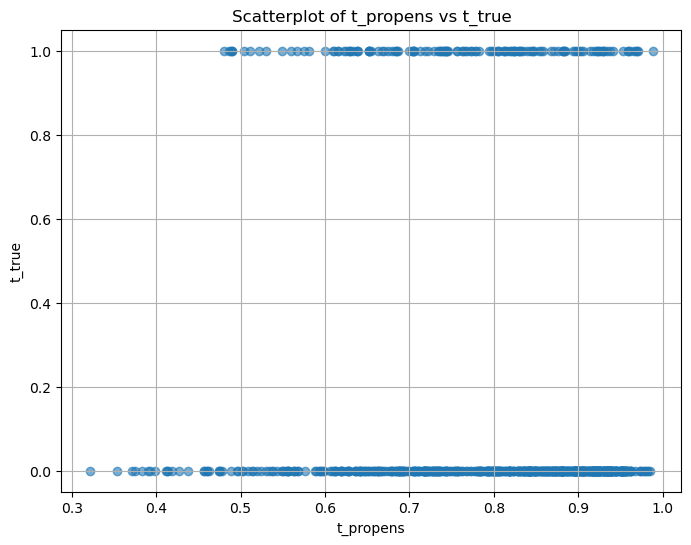

In [4]:

df, df_data= load_dataset()
results = run_models(df, df_data)
print(df.columns)
print(df.columns)

t_propens, t_true = results['t_propens'], results['t_true']
df['propensity_score'] =t_propens

thresholds= determine_thresholds_different_functions(df, t_true, t_propens)
print(thresholds)

#method could be diff metrics, I chose F1 since it is a combination of the precision and recall
method='f1_score'
print(thresholds[method])
t_pred = np.where(t_propens > thresholds[method], 0, 1)
print(t_pred)

#add column to df, which treatment was predicted
df['t_predicted'] =t_pred

plt.figure(figsize=(8, 6))
plt.scatter(t_propens, t_true, alpha=0.6)
plt.title("Scatterplot of t_propens vs t_true")
plt.xlabel("t_propens")
plt.ylabel("t_true")
plt.grid(True)
plt.show()

In [2]:
# Re-plotting with Seaborn for density plots
plt.figure(figsize=(10, 6))

is_true = t_true > 0.5

# Splitting t_propens based on the condition
t_propens_true = t_propens[is_true]
t_propens_false = t_propens[~is_true]

# Density plot for t_propens where t_true is true
sns.kdeplot(t_propens_true, shade=True, color="r", label="t_propens (t_true is 1)")

# Density plot for t_propens where t_true is false
sns.kdeplot(t_propens_false, shade=True, color="b", label="t_propens (t_true is 0)")

plt.title("Density Plots of t_propens")
plt.xlabel("t_propens")
plt.ylabel("Density")
plt.legend()
plt.show()

NameError: name 'plt' is not defined

evaluation metrics for model 1

In [4]:
#predicted treatments: t_pred
#actual treatments: t_true
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(t_true, t_pred)
print(conf_matrix)
'''
gives a matrix of the form: 
[[True Negative  False Positive]
 [False Negative True Positive]]
'''
TP = conf_matrix[1, 1]
TN= conf_matrix[0, 0]
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]

costs = costs_calculation(TP, TN, FP, FN, reject_treatm_neg=0, reject_treatm_pos=0, cost_TP=0, cost_TN=-5, cost_FN=20, cost_FP=10, cost_reject=5)
print(costs)

accuracy,precision,recall,f1 = metrics_rejected(TP,TN,FP,FN,reject_treatm_neg=0,reject_treatm_pos=0)
print('accuracy: ', accuracy)
print('precision:',precision)
print('recall: ',recall)
print('f1: ',f1)


df = ITE_predict_column(df)
print(df)
print("Number of rows in df:", len(df))

rmse= np.sqrt(mean_squared_error(df['ITE'], df['ITE_predicted']))
roc_auc =roc_auc_score(df['treatment'], df['t_predicted'])
ATE_true = (df['y_factual'].mean() -df['y_cfactual'].mean())
ATE_pred= df['ITE_predicted'].mean()

print('rmse is :',rmse)
print('roc_auc_score is: ', roc_auc)
print('ATE_pred: ', ATE_pred)
print('ATE_true: ', ATE_true)




[[332 276]
 [ 49  90]]
2080
accuracy:  0.5649263721552878
precision: 0.2459016393442623
recall:  0.6474820143884892
f1:  0.3564356435643564
     treatment  y_factual  y_cfactual       mu0       mu1        x1        x2  \
0         True   5.599916    4.318780  3.268256  6.854457 -0.528603 -0.343455   
1        False   6.875856    7.856495  6.636059  7.562718 -1.736945 -1.802002   
2        False   2.996273    6.633952  1.570536  6.121617 -0.807451 -0.202946   
3        False   1.366206    5.697239  1.244738  5.889125  0.390083  0.596582   
4        False   1.963538    6.202582  1.685048  6.191994 -1.045229 -0.602710   
..         ...        ...         ...       ...       ...       ...       ...   
742      False   4.091946    6.061976  3.986826  7.053195 -0.007654 -0.202946   
743       True   5.501677    4.237157  4.111877  7.084080  0.727295 -0.202946   
744      False   1.842583    4.949537  2.346736  6.523225  1.181234  0.196818   
745      False   3.076368    7.554212  2.114661  6

alternative prediction model : propensity score matching
---> uses knn to classify predicted treatment instead of the propensity scores and a treshold

In [5]:
from data_loader import load_dataset
from evaluation_metrics import costs_calculation
import pandas as pd
df, df_data = load_dataset()
from propensity_score_matching import propensity_score_matching_function
from evaluation_metrics import costs_calculation

matched_pairs,df = propensity_score_matching_function(df,df_data,treatment='treatment',k_neighbors=10, min_treatment_count=3)
t_true = matched_pairs['treatment']
t_pred = matched_pairs['t_predicted']
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
k_neighbors=10
results = []
for i in range(k_neighbors):
        matched_pairs, df = propensity_score_matching_function(df,df_data,min_treatment_count= i,treatment='treatment',k_neighbors=10)
        t_true = matched_pairs['treatment']
        t_pred = matched_pairs['t_predicted']

        # Metrics
        accuracy = accuracy_score(t_true, t_pred)
        precision = precision_score(t_true, t_pred)
        recall = recall_score(t_true, t_pred)
        f1 = f1_score(t_true, t_pred)
        conf_matrix = confusion_matrix(t_true,t_pred)
        TP = conf_matrix[1, 1]
        TN= conf_matrix[0, 0]
        FP = conf_matrix[0, 1]
        FN = conf_matrix[1, 0]
        costs = costs_calculation(TP,TN,FP,FN,reject_treatm_neg=0,reject_treatm_pos=0,cost_TP=0,cost_TN=0,cost_FN=20,cost_FP=10, cost_reject=5)
        
        # Append metrics to results
        results.append({
            'min_treatment_count': i,
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall,
            'f1': f1,
            'cost':costs,
            'confusion matrix': conf_matrix
        })

# Create a DataFrame from the results list
results_df = pd.DataFrame(results)
print(results_df)
#pick the metric you want to optimize
metric = "f1"
best_i = results_df.loc[results_df[metric].idxmax()]['min_treatment_count']

#do the propensity scoring for the i with max f1:
matched_pairs,df = propensity_score_matching_function(df,df_data,treatment='treatment',k_neighbors=10, min_treatment_count=best_i)
t_true = matched_pairs['treatment']
t_pred = matched_pairs['t_predicted']

conf_matrix = confusion_matrix(t_true,t_pred)
print(conf_matrix)
# Metrics
accuracy = accuracy_score(t_true, t_pred)
precision = precision_score(t_true, t_pred)
recall = recall_score(t_true, t_pred)
f1 = f1_score(t_true, t_pred)

print(accuracy)
print(precision)
print(recall)
print(f1)

TP = conf_matrix[1, 1]
TN= conf_matrix[0, 0]
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]

costs = costs_calculation(TP,TN,FP,FN,reject_treatm_neg=0,reject_treatm_pos=0,cost_TP=0,cost_TN=0,cost_FN=20,cost_FP=10, cost_reject=5)
print(costs)

c:\Users\justine\miniconda3\envs\sklearn-env\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but NearestNeighbors was fitted without feature names
  warnings.warn(
c:\Users\justine\miniconda3\envs\sklearn-env\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but NearestNeighbors was fitted without feature names
  warnings.warn(
c:\Users\justine\miniconda3\envs\sklearn-env\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but NearestNeighbors was fitted without feature names
  warnings.warn(
c:\Users\justine\miniconda3\envs\sklearn-env\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but NearestNeighbors was fitted without feature names
  warnings.warn(
c:\Users\justine\miniconda3\envs\sklearn-env\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but NearestNeighbors was fitted without feature names
  warnings.warn(
c:\Users\justine\miniconda3\envs\sklearn-env\Lib\site-p

   min_treatment_count  accuracy  precision    recall        f1  cost  \
0                    0  0.186078   0.186078  1.000000  0.313770  6080   
1                    1  0.433735   0.238007  0.928058  0.378855  4330   
2                    2  0.554217   0.255051  0.726619  0.377570  3710   
3                    3  0.686747   0.285068  0.453237  0.350000  3100   
4                    4  0.767068   0.333333  0.251799  0.286885  2780   
5                    5  0.805890   0.437500  0.151079  0.224599  2630   
6                    6  0.800535   0.187500  0.021583  0.038710  2850   
7                    7  0.811245   0.000000  0.000000  0.000000  2800   
8                    8  0.813922   0.000000  0.000000  0.000000  2780   
9                    9  0.813922   0.000000  0.000000  0.000000  2780   

          confusion matrix  
0     [[0, 608], [0, 139]]  
1  [[195, 413], [10, 129]]  
2  [[313, 295], [38, 101]]  
3   [[450, 158], [76, 63]]  
4   [[538, 70], [104, 35]]  
5   [[581, 27], [118, 

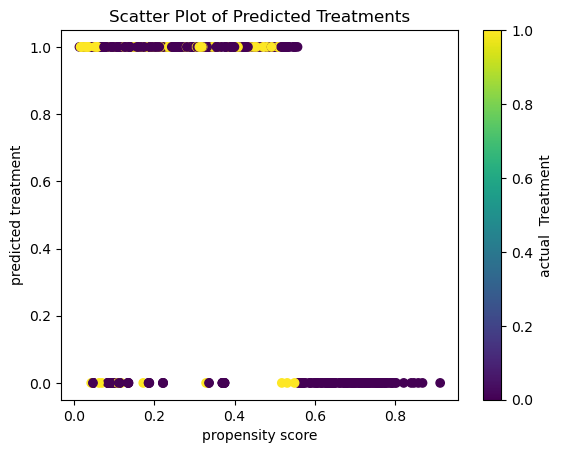

In [6]:
import matplotlib.pyplot as plt

# Scatter plot
plt.scatter(df['propensity_score'], df['t_predicted'], c=df['treatment'], cmap='viridis')
plt.xlabel('propensity score')
plt.ylabel('predicted treatment')
plt.title('Scatter Plot of Predicted Treatments')
plt.colorbar(label='actual  Treatment')
plt.show()

C:\Users\justine\AppData\Local\Temp\ipykernel_19332\3215569918.py:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(results_df['min_treatment_count'], results_df['cost'], cmap='viridis')


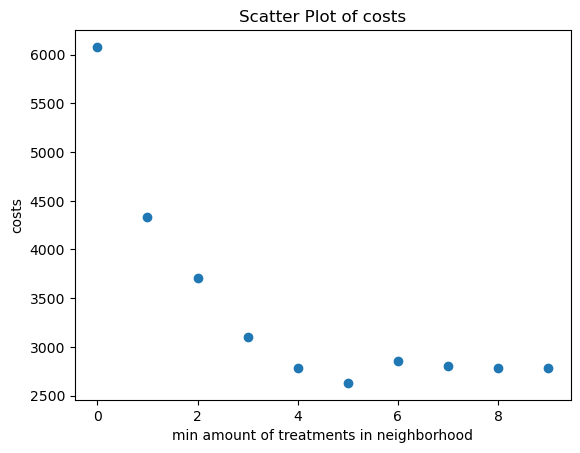

In [7]:
plt.scatter(results_df['min_treatment_count'], results_df['cost'], cmap='viridis')
plt.xlabel('min amount of treatments in neighborhood')
plt.ylabel('costs')
plt.title('Scatter Plot of costs')
plt.show()

model 1: novelty rejection using isolation forest
used architecture = separated rejector: first do the rejection using isolationforest, then do the prediction with prospensity scores


In [8]:
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import GridSearchCV
from model_executor import evaluate_isolation_forest_with_grid_search

#experiment 1: novelty rejection using isolation forest, optimization done through the f1 score
#architecture: separated rejector: we FIRST do the REJECTION and then do the prediction
# Define the parameter grid and other parameters

#first, we execute the rejector, based on the grid search for optimization of these values: rejection is thus only done on the distribution of df_data representing the covariates (X1-X25)

#load data again, to start from a new state
df, df_data = load_dataset()
t_true = df['treatment']

param_grid = {
    'contamination': [0.001, 0.005, 0.01, 0.05, 0.1, 0.15, 0.2],
    'max_samples': [10, 50, 100, 'auto', None],
    'random_state': [42]  
}

cv = 5  # Number of cross-validation folds
metric = 'f1'  # Evaluation metric

# Call the function to get outlier predictions
outlier_predictions = evaluate_isolation_forest_with_grid_search(df_data, param_grid, t_true, cv, metric)
df['isoutlier']=  (outlier_predictions == -1)
print(df['isoutlier'])

count_outliers = len(df[df['isoutlier'] == True])
print("Number of observations that are outliers:", count_outliers)

#then we do the prediction based on the accepted observations : step 2
accepted_samples = df[df['isoutlier'] == False]
print(accepted_samples)
accepted_samples_data = accepted_samples.drop(columns=["y_factual", "y_cfactual", "ITE", "treatment"])
print(accepted_samples_data)
print("Number of rows in accepted samples:", len(accepted_samples))
run_models(df= accepted_samples, df_data= accepted_samples_data)
results = run_models(df= accepted_samples, df_data= accepted_samples_data)

t_propens, t_true = results['t_propens'], results['t_true']
accepted_samples['t_propensity']= t_propens
print(t_propens)
thresholds= determine_thresholds_different_functions(df = accepted_samples, t_true= t_true, propensity_scores= t_propens)
'''
df: pd.DataFrame, t_true: pd.Series, propensity_scores: pd.Series):
'''
print(thresholds)

#method could be diff metrics, I chose F1 since it is a combination of the precision and recall
method='f1_score'
print(thresholds[method])
t_pred = np.where(t_propens > thresholds[method], 0, 1)
print(t_pred)
print("Number of rowsin t_propens:", len(t_propens))


c:\Users\justine\miniconda3\envs\sklearn-env\Lib\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\justine\miniconda3\envs\sklearn-env\Lib\site-packages\sklearn\model_selection\_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\justine\miniconda3\envs\sklearn-env\Lib\site-packages\sklearn\metrics\_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\justine\miniconda3\envs\sklearn-env\Lib\site-packages\sklearn\metrics\_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kw

[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1

c:\Users\justine\miniconda3\envs\sklearn-env\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\justine\miniconda3\envs\sklearn-env\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\justine\miniconda3\envs\sklearn-env\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\U

[0.71474106 0.95209478 0.87400431 0.86904855 0.90641752 0.7567454
 0.70471339 0.72556556 0.68219814 0.89141878 0.81903325 0.86768082
 0.88762395 0.53070134 0.82499054 0.8880156  0.86258176 0.75171723
 0.61928518 0.87603317 0.79226137 0.74470402 0.81151527 0.89439721
 0.83408732 0.7665645  0.8669088  0.77609875 0.63237781 0.84250987
 0.63088    0.87431104 0.86456757 0.91546698 0.80036954 0.8042938
 0.68679823 0.85334189 0.72283713 0.61337578 0.79034484 0.77868578
 0.74079391 0.56682462 0.70477761 0.7332153  0.70950671 0.90121143
 0.7816042  0.72089922 0.80367842 0.64773612 0.73481471 0.6154994
 0.77168494 0.82967621 0.87132733 0.76690574 0.70790156 0.88728411
 0.87330254 0.83834202 0.87259657 0.58789665 0.86846551 0.90470896
 0.90405028 0.68211982 0.91390322 0.88805434 0.83218921 0.71726033
 0.65064978 0.71280216 0.83161077 0.6866093  0.66014937 0.84485985
 0.78700373 0.65752897 0.6311249  0.79862051 0.75036307 0.83483452
 0.88555148 0.86210368 0.82511155 0.90262456 0.64010931 0.8050249

c:\Users\justine\miniconda3\envs\sklearn-env\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\justine\miniconda3\envs\sklearn-env\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\justine\miniconda3\envs\sklearn-env\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\U

{'f1_score': 0.8250000000000001, 'accuracy_score': 0.30000000000000004, 'roc_auc_score': 0.8250000000000001, 'average_precision_score': 0.8250000000000001, 'balanced_accuracy_score': 0.8250000000000001, 'precision_score': 0.7000000000000001, 'recall_score': 0.9750000000000001, 'jaccard_score': 0.8250000000000001}
0.8250000000000001
[1 0 0 0 0 1 1 1 1 0 1 0 0 1 1 0 0 1 1 0 1 1 1 0 0 1 0 1 1 0 1 0 0 0 1 1 1
 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 1 1 1
 0 1 1 0 1 1 1 1 1 0 0 0 0 0 1 1 1 1 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0
 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 1 0 1 1 1 1 0 0 1 1 0
 0 1 1 0 1 0 1 1 1 1 1 0 1 0 1 1 1 1 1 0 0 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0
 1 1 1 0 0 1 0 1 1 1 1 0 1 1 1 0 1 1 0 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1
 1 1 1 0 1 1 1 1 0 0 1 1 1 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 1 0 1 1

In [9]:
#predicted treatments: t_pred
#actual treatments: t_true
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(t_true, t_pred)
print(conf_matrix)
'''
gives a matrix of the form: 
[[True Negative  False Positive]
 [False Negative True Positive]]
'''
TP = conf_matrix[1, 1]
TN= conf_matrix[0, 0]
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]

costs = costs_calculation(TP, TN, FP, FN, reject_treatm_neg=0, reject_treatm_pos=0, cost_TP=0, cost_TN=-5, cost_FN=20, cost_FP=10, cost_reject=5)
print(costs)

accuracy,precision,recall,f1 = metrics_rejected(TP,TN,FP,FN,reject_treatm_neg=0,reject_treatm_pos=0)
print('accuracy: ', accuracy)
print('precision:',precision)
print('recall: ',recall)
print('f1: ',f1)

#add column to df, which treatment was predicted
t_pred_Series=pd.Series(t_pred)
result_df = pd.concat([accepted_samples.reset_index(drop=True), pd.DataFrame({'t_predicted': t_pred_Series})], axis=1)
print(result_df.columns)
print("Number of rowsin accepted samples with t_predicted:", len(result_df))


print('accepted_samples', result_df)


accepted_samples = ITE_predict_column(df = result_df)
print(accepted_samples)
print('columns of result_df:', accepted_samples.columns)
nan_count = accepted_samples['ITE_predicted'].isnull().sum()

print("Number of NaN values in 'ITE_predicted':", nan_count)

rmse= np.sqrt(mean_squared_error(accepted_samples['ITE'], accepted_samples['ITE_predicted']))
roc_auc =roc_auc_score(accepted_samples['treatment'], accepted_samples['t_predicted'])
ATE_true = (accepted_samples['y_factual'].mean() -accepted_samples['y_cfactual'].mean())
ATE_pred= accepted_samples['ITE_predicted'].mean()

print('rmse is :',rmse)
print('roc_auc_score is: ', roc_auc)
print('ATE_pred: ', ATE_pred)
print('ATE_true: ', ATE_true)



[[334 273]
 [ 49  90]]
2040
accuracy:  0.5683646112600537
precision: 0.24793388429752067
recall:  0.6474820143884892
f1:  0.3585657370517928
Index(['treatment', 'y_factual', 'y_cfactual', 'mu0', 'mu1', 'x1', 'x2', 'x3',
       'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14',
       'x15', 'x16', 'x17', 'x18', 'x19', 'x20', 'x21', 'x22', 'x23', 'x24',
       'x25', 'ITE', 'isoutlier', 't_propensity', 't_predicted'],
      dtype='object')
Number of rowsin accepted samples with t_predicted: 746
accepted_samples      treatment  y_factual  y_cfactual       mu0       mu1        x1        x2  \
0         True   5.599916    4.318780  3.268256  6.854457 -0.528603 -0.343455   
1        False   6.875856    7.856495  6.636059  7.562718 -1.736945 -1.802002   
2        False   2.996273    6.633952  1.570536  6.121617 -0.807451 -0.202946   
3        False   1.366206    5.697239  1.244738  5.889125  0.390083  0.596582   
4        False   1.963538    6.202582  1.685048  6.191994 -

C:\Users\justine\AppData\Local\Temp\ipykernel_19332\1611478187.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(accepted_samples[accepted_samples['treatment'] == 0]['t_predicted'], label='Treatment 0', shade=True)
c:\Users\justine\miniconda3\envs\sklearn-env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\justine\AppData\Local\Temp\ipykernel_19332\1611478187.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(accepted_samples[accepted_samples['treatment'] == 1]['t_predicted'], label='Treatment 1', shade=True)
c:\Users\justine\miniconda3\envs

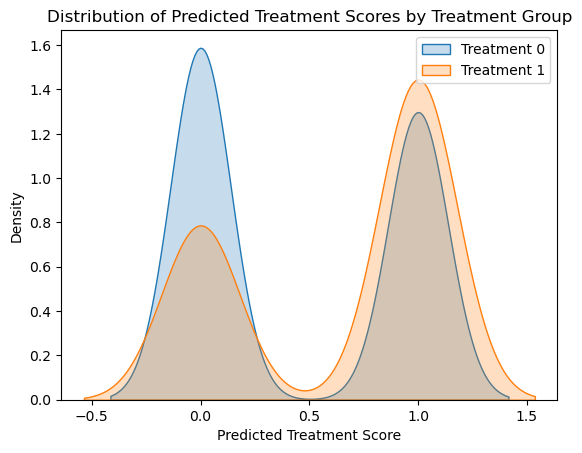

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.kdeplot(accepted_samples[accepted_samples['treatment'] == 0]['t_predicted'], label='Treatment 0', shade=True)
sns.kdeplot(accepted_samples[accepted_samples['treatment'] == 1]['t_predicted'], label='Treatment 1', shade=True)
plt.xlabel('Predicted Treatment Score')
plt.ylabel('Density')
plt.title('Distribution of Predicted Treatment Scores by Treatment Group')
plt.legend()
plt.show()

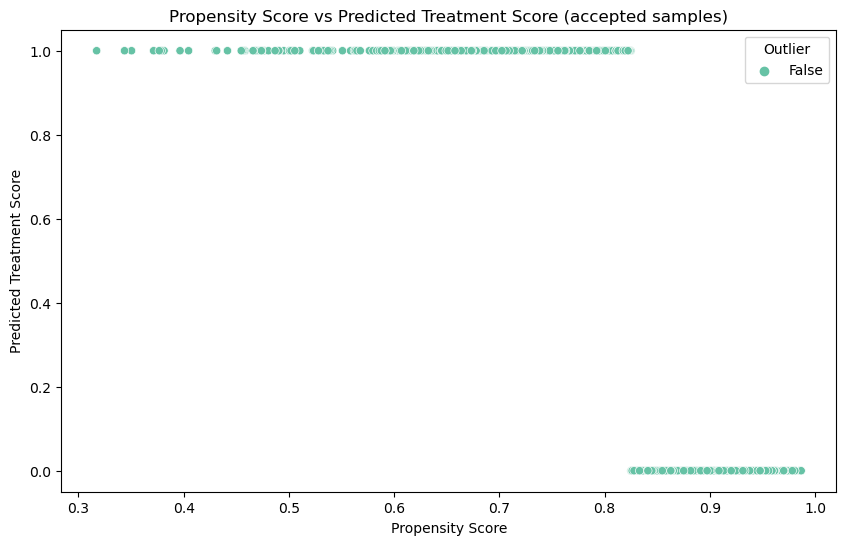

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
plt.figure(figsize=(10, 6))  # Adjust figure size as needed


# Scatter plot of propensity score vs inlier/outlier
sns.scatterplot(x= accepted_samples['t_propensity'], y=accepted_samples['t_predicted'], hue= accepted_samples['isoutlier'], palette='Set2')
plt.xlabel('Propensity Score')
plt.ylabel('Predicted Treatment Score')
plt.title('Propensity Score vs Predicted Treatment Score (accepted samples)')
plt.legend(title='Outlier')
plt.show()

isolation forest, again, with method 2:PSM 
--> the PSM is evaluated only on the accepted accepted_samples
architecture= separated rejector


In [12]:
#load data again, to start from a new state
from model_executor import evaluate_isolation_forest_with_grid_search
from propensity_score_matching import propensity_score_matching_function,estimate_propensity_scores,perform_matching
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from data_loader import load_dataset

df, df_data = load_dataset()
t_true = df['treatment']

param_grid = {
    'contamination': [0.001, 0.005, 0.01, 0.05, 0.1, 0.15, 0.2],
    'max_samples': [10, 50, 100, 'auto', None],
    'random_state': [42]  
}

cv = 5  # Number of cross-validation folds
metric = 'f1'  # Evaluation metric

# Call the function to get outlier predictions
outlier_predictions = evaluate_isolation_forest_with_grid_search(df_data, param_grid, t_true, cv, metric)
df['isoutlier']=  (outlier_predictions == -1)

count_outliers = len(df[df['isoutlier'] == True])
print("Number of observations that are outliers:", count_outliers)
reject_treatm_pos= df[(df['isoutlier'] == True) & (df['treatment'] == 1)]
reject_treatm_neg= df[(df['isoutlier'] == True) & (df['treatment'] == 0)]



#then we do the prediction based on the accepted observations : step 2
accepted_samples = df[df['isoutlier'] == False].reset_index(drop=True)
accepted_samples_data = accepted_samples.drop(columns=["y_factual", "y_cfactual", "ITE", "treatment",'mu0','mu1'])



#now perform PSM

#first select the best neighboorhood search according to metric of choice:
k_neighbors=10
for i in range(k_neighbors):
        matched_pairs, df = propensity_score_matching_function(accepted_samples,accepted_samples_data,min_treatment_count= i,treatment='treatment',k_neighbors=k_neighbors)
        t_true = matched_pairs['treatment']
        t_pred = matched_pairs['t_predicted']
        #maak hier nog een functie van !!!!
        # Metrics
        accuracy = accuracy_score(t_true, t_pred)
        precision = precision_score(t_true, t_pred)
        recall = recall_score(t_true, t_pred)
        f1 = f1_score(t_true, t_pred)
        conf_matrix = confusion_matrix(t_true,t_pred)
        TP = conf_matrix[1, 1]
        TN= conf_matrix[0, 0]
        FP = conf_matrix[0, 1]
        FN = conf_matrix[1, 0]
        costs = costs_calculation(TP,TN,FP,FN,reject_treatm_neg=0,reject_treatm_pos=0,cost_TP=0,cost_TN=0,cost_FN=20,cost_FP=10, cost_reject=5)
        
        # Append metrics to results
        results.append({
            'min_treatment_count': i,
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall,
            'f1': f1,
            'cost':costs,
            'confusion matrix': conf_matrix
        })

# Create a DataFrame from the results list
results_df = pd.DataFrame(results)
print(results_df)
#pick the metric you want to optimize
#cost, f1, ......
metric = "f1"
best_i = results_df.loc[results_df[metric].idxmax()]['min_treatment_count']

#do the propensity scoring for the i with max f1:
matched_pairs,df = propensity_score_matching_function(df,df_data,treatment='treatment',k_neighbors=10, min_treatment_count=best_i)
t_true = matched_pairs['treatment']
t_pred = matched_pairs['t_predicted']
# Metrics
accuracy = accuracy_score(t_true, t_pred)
precision = precision_score(t_true, t_pred)
recall = recall_score(t_true, t_pred)
f1 = f1_score(t_true, t_pred)
conf_matrix = confusion_matrix(t_true,t_pred)
TP = conf_matrix[1, 1]
TN= conf_matrix[0, 0]
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]
costs = costs_calculation(TP,TN,FP,FN,reject_treatm_neg=0,reject_treatm_pos=0,cost_TP=0,cost_TN=0,cost_FN=20,cost_FP=10, cost_reject=5)






c:\Users\justine\miniconda3\envs\sklearn-env\Lib\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\justine\miniconda3\envs\sklearn-env\Lib\site-packages\sklearn\model_selection\_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\justine\miniconda3\envs\sklearn-env\Lib\site-packages\sklearn\metrics\_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\justine\miniconda3\envs\sklearn-env\Lib\site-packages\sklearn\metrics\_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kw

[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1

c:\Users\justine\miniconda3\envs\sklearn-env\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but NearestNeighbors was fitted without feature names
  warnings.warn(


AttributeError: 'dict' object has no attribute 'append'

now: evaluation metrics for isolation forest with PSM


TODO: make the function: evaluation_metrics for (t_true, t_pred)
TODO: make function that automatically decides what the amount of treatments should be based on the metric that is chosen


In [ ]:

#in order to asses the other metrics we need the ITE_pred column
from model_executor import ITE_predict_column
from evaluation_metrics import metrics_df
accepted_samples = ITE_predict_column(accepted_samples)
rmse, roc_auc,ATE_true, ATE_pred = metrics_df(df)




In [ ]:
'''
from evaluation_metrics import confusion_matrix_custom
TP,TN,FP,FN,reject_treatm_neg,reject_treatm_pos,conf_matrix = confusion_matrix_custom(df)
print(conf_matrix)
costs = costs_calculation(TP, TN, FP, FN, reject_treatm_neg, reject_treatm_pos, cost_TP=0, cost_TN=-5, cost_FN=20, cost_FP=10, cost_reject=5)
print('the costs are: ', costs)

from evaluation_metrics import metrics_rejected
accuracy,precision,recall,f1 = metrics_rejected(TP,TN,FP,FN,reject_treatm_neg,reject_treatm_pos)
print("accuracy",accuracy)
print("precision",precision)
print('recall',recall)
print('f1',f1)
'''


model 2: novelty rejection using isolation forest, combined with prediction as to be able to minimize costs, rmse, ...

architecture: I'm not really sure, but I think integrated, the rejection is done dependent on the prediction estimates
the prediction estimayes change when doing rejection

In [ ]:
#Now we want to select the model that minimizes the costs
#tune the contamination value
#experiment 2: novelty rejection through the isolation forest, minimizing the costs.


from model_executor import ITE_predict_column
df, df_data = load_dataset()

"""
results = run_models(df, df_data)
print(df.columns)

t_propens, t_true = results['t_propens'], results['t_true']
df['propensity_score'] =t_propens
thresholds= determine_thresholds_different_functions(df, t_true, t_propens)
print(thresholds)

#method could be diff metrics, I chose F1 since it is a combination of the precision and recall
method='f1_score'
print(thresholds[method])
t_pred = np.where(t_propens > thresholds[method], 0, 1)
print(t_pred)

#add column to df, which treatment was predicted
df['t_predicted'] =t_pred

df = ITE_predict_column(df)
print(df.columns)
"""

from model_executor import contamination_value
results_df = contamination_value(df_data, df)
print(results_df)

#note= the selected contamination values are very dependent on the costs


In [ ]:
print(results_df)

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

plt.plot(results_df['Contamination'], results_df['accuracy'], label='Accuracy')
plt.plot(results_df['Contamination'], results_df['precision'], label='Precision')

plt.plot(results_df['Contamination'], results_df['recall'], label='Recall')
plt.plot(results_df['Contamination'], results_df['f1'], label='F1')

plt.xlabel('Contamination')
plt.ylabel('Metrics Value')
plt.title('Performance Metrics over Contamination')
plt.legend()
plt.show()


In [ ]:
plt.figure(figsize=(10, 6))

plt.plot(results_df['Contamination'], results_df['Cost'], label='Cost', color='red')

plt.xlabel('Contamination')
plt.ylabel('Cost')
plt.title('Cost over Contamination')
plt.legend()
plt.show()

In [ ]:

lowest_cost_row = results_df.loc[results_df['Cost'].idxmin()]

print("Row with the lowest cost:")
print(lowest_cost_row)
print('the contamination for which the cost is lowest is: ',lowest_cost_row['Contamination'])


In [ ]:
plt.figure(figsize=(10, 6))

plt.plot(results_df['Contamination'], results_df['roc-auc'], label='roc-auc', color='orange')

plt.xlabel('Contamination')
plt.ylabel('roc-auc')
plt.title('roc-auc over Contamination')
plt.legend()
plt.show()




In [ ]:
plt.figure(figsize=(10, 6))

plt.plot(results_df['Contamination'], results_df['rmse'], label='rmse', color='red')

plt.xlabel('Contamination')
plt.ylabel('rmse')
plt.title('rmse over Contamination')
plt.legend()
plt.show()

In [ ]:
lowest_rmse_row = results_df.loc[results_df['rmse'].idxmin()]

print("Row with the lowest rmse:")
print(lowest_cost_row)
print('the contamination for which the rmse is lowest is: ',lowest_cost_row['Contamination'])

code for the contamination function using PSM instead of just the propensity scores:
- still need to optimize min_treatment_count
- still need to make a function for: - optimizing min_treatment_count, metrics evaluation of PSM


In [ ]:
from data_loader import load_dataset
from model_executor import contamination_value_PSM

df, df_data = load_dataset()
result_df = contamination_value_PSM(df, df_data)

print(result_df)


In [ ]:
import pandas as pd

# Assume df is your DataFrame
# ...

# Set the display option to show all columns
pd.set_option('display.max_columns', None)

# Display your DataFrame
print(result_df)

# After displaying the DataFrame, you might want to reset the option to its default value
pd.reset_option('display.max_columns')

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

plt.plot(result_df['contamination value'], result_df['cost'], label='cost', color='red')

plt.xlabel('Contamination')
plt.ylabel('Cost')
plt.title('Cost over Contamination')
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))

plt.plot(result_df['contamination value'], result_df['roc-auc_accepted'], label='roc-auc', color='orange')

plt.xlabel('Contamination')
plt.ylabel('roc-auc')
plt.title('roc-auc over Contamination')
plt.legend()
plt.show()



In [ ]:
plt.figure(figsize=(10, 6))

plt.plot(result_df['contamination value'], result_df['rmse_accepted'], label='rmse', color='red')

plt.xlabel('Contamination')
plt.ylabel('rmse')
plt.title('rmse over Contamination')
plt.legend()
plt.show()

AMBIGUITY REJECTION
--> use bootstrapping/ensembles
TO BE DONE


STEP 1: Define the Metric of Interest:
Decide on the metric you want to assess variability for on the dataset. This could be a summary statistic or an aggregate measure of prediction performance.

=> We want to asses the variability in the prediction to measure the 'certainty' of prediction

STEP 2: Implement Bootstrapping:
Write a function to perform bootstrapping. This function will involve repeatedly sampling with replacement from your dataset, making predictions on each bootstrap sample, computing the metric of interest on the predictions, and storing the results.



STEP 3: Calculate Confidence Intervals:
Use the bootstrapped results to calculate confidence intervals for your metric of interest.

STEP 4: Assess Dataset Variability:
Compare the metric value for the entire dataset to the calculated confidence intervals. If the dataset's metric value is outside the confidence interval, it indicates higher variability.


architecture: separated: first do the prediction then do the rejection afterwards
< -- > novelty rejection: we did the rejection first and then the prediction




In [ ]:
from propensity_score_matching import propensity_score_matching_function
from ambiguity_rejection import bootstrap_confidence_interval,ambiguity_rejection_function
# Load your dataset
from data_loader import load_dataset
import pandas as pd
# Reset to default values
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')


df, df_data = load_dataset()
min_treatment_count = 3
#estimate propensity scores: 

matched_pairs, df = propensity_score_matching_function(df,df_data, min_treatment_count,treatment='treatment',k_neighbors=10)


print(df)

#perform ambiguity rejection
lower_bound, upper_bound = bootstrap_confidence_interval(t_true= df['treatment'], df_data = df_data, num_bootstraps=1000,alpha=0.5)

df = ambiguity_rejection_function(df, df['propensity_score'], lower_bound, upper_bound)

print(df)






In [ ]:
print('lower_bound', lower_bound)
print('upper bound:',upper_bound)







In [ ]:

count_R = len(df[df['t_predicted'] == 'R'])
print(f"Number of rows with 't_predicted' = 'R': {count_R}")



In [ ]:

print(df_data.columns)